In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import scipy.io as scio

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,RepeatVector,BatchNormalization,Activation,Conv1D,MaxPooling2D,UpSampling1D,Flatten,Conv2D,UpSampling2D,MaxPool1D,Flatten,LSTM
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import recall_score,classification_report,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score

from numpy.random import seed
seed(1)
os.environ['PYTHONHASHSEED']=str(0)
SEED=2019
DATA_SPLIT_PCT=0.2

nb_epoch=200
batch_size=64
input_dim=152
encoding_dim=64
hidden_dim=int(encoding_dim/2)
learning_rate=1e-3

In [2]:
# Import pandas library
import pandas as pd
import numpy as np
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom_LabelScale.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [3]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()

In [4]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [5]:
'''
features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' ]]   
print(features.shape)
'''

"\nfeatures = df[[  'Signal012',\n                'Signal013',\n                'Signal112',\n                'Signal711',\n                'Signal712',\n                'Signal713',\n                'Signal714' ]]   \nprint(features.shape)\n"

In [6]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)
# Split the dataset into training set and development set
#x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.4, random_state = 10)
y_test_cate=to_categorical(y_test,num_classes=11)
y_train_cate=to_categorical(y_train,num_classes=11)
#数据标准化
scaler=StandardScaler().fit(x_train)
x_train_rescaled=scaler.transform(x_train)
x_test_rescaled=scaler.transform(x_test)
print(y_test.shape)

print(x_train_rescaled.shape)
x_train_rescaled=x_train_rescaled.reshape(1301,19,8)
x_test_rescaled=x_test_rescaled.reshape(868,19,8)

(868,)
(1301, 152)


In [7]:
PRE=[]
TRUE=[]
ACC=[]
for i in range(10):
#autoencoder
    input_img=Input(shape=(19,8))

    x=LSTM(32,activation='relu')(input_img)

    x=Dense(16,activation='relu')(x)

    LR=Dense(11,activation="softmax",name='LR')(x)
    
    model=Model(inputs=input_img,outputs=LR)

    # Training
# 选择评价函数，选择优化器，指定损失函数
    model.compile(metrics=['accuracy'],
                        loss= ['categorical_crossentropy'],
                        optimizer=Adam(lr=learning_rate))

    cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                        save_best_only=True,
                        monitor='val_LR_accuracy',
                        verbose = 0)

    tb = TensorBoard(log_dir='./logs',
                    histogram_freq=0,
                    write_graph=True,
                    write_images=True)

    history = model.fit(x_train_rescaled,y_train_cate,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_rescaled, y_test_cate),
                          verbose=1).history
    acc=model.evaluate(x_test_rescaled,y_test_cate)
    pre=model.predict(x_test_rescaled)
    y_pred=np.argmax(pre,axis=1)
    PRE.append(y_pred)
    TRUE.append(y_test)
    ACC.append(acc[1])
print(np.mean(ACC),np.std(ACC))


Epoch 1/200


C:\Users\bhuah\.conda\envs\BHEvir\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 1s 23ms/step - loss: 2.3702 - accuracy: 0.0984 - val_loss: 2.2976 - val_accuracy: 0.2074
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 2.2276 - accuracy: 0.2183 - val_loss: 1.9967 - val_accuracy: 0.2995
Epoch 3/200
21/21 [==============================] - 0s 7ms/step - loss: 1.9852 - accuracy: 0.2767 - val_loss: 1.6909 - val_accuracy: 0.3249
Epoch 4/200
21/21 [==============================] - 0s 7ms/step - loss: 1.7479 - accuracy: 0.3098 - val_loss: 1.5673 - val_accuracy: 0.3894
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 1.4901 - accuracy: 0.4673 - val_loss: 1.3468 - val_accuracy: 0.4942
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 1.3993 - accuracy: 0.5304 - val_loss: 1.3232 - val_accuracy: 0.5196
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 1.2146 - accuracy: 0.5573 - val_loss: 1.0358 - val_accuracy: 0.5887
Epoch 8/200
21/21 [=====

Epoch 59/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 0.1297 - val_accuracy: 0.9896
Epoch 60/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.0949 - val_accuracy: 0.9908
Epoch 61/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.1003 - val_accuracy: 0.9896
Epoch 62/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9977 - val_loss: 0.1039 - val_accuracy: 0.9896
Epoch 63/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0774 - val_accuracy: 0.9908
Epoch 64/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0823 - val_accuracy: 0.9919
Epoch 65/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.0945 - val_accuracy: 0.9919
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0302 - val_accuracy: 0.9954
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0215 - val_accuracy: 0.9965
Epoch 118/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0258 - val_accuracy: 0.9954
Epoch 119/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0298 - val_accuracy: 0.9954
Epoch 120/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0262 - val_accuracy: 0.9954
Epoch 121/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0333 - val_accuracy: 0.9942
Epoch 122/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0294 - val_accuracy: 0.9954
Epoch 1

Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 6.3628e-04 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9965
Epoch 174/200
21/21 [==============================] - 0s 10ms/step - loss: 6.0111e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9965
Epoch 175/200
21/21 [==============================] - 0s 9ms/step - loss: 5.7242e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9965
Epoch 176/200
21/21 [==============================] - 0s 11ms/step - loss: 5.4621e-04 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9965
Epoch 177/200
21/21 [==============================] - 0s 10ms/step - loss: 5.1146e-04 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9965
Epoch 178/200
21/21 [==============================] - 0s 12ms/step - loss: 5.1078e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9965
Epoch 179/200
21/21 [==============================] - 0s 12ms/step - loss: 4.8589e-04 - accuracy: 1.0000 - val_l

Epoch 29/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 0.9962 - val_loss: 0.0289 - val_accuracy: 0.9931
Epoch 30/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0243 - accuracy: 0.9954 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 31/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0228 - accuracy: 0.9946 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 32/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0269 - accuracy: 0.9923 - val_loss: 0.0670 - val_accuracy: 0.9850
Epoch 33/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0279 - accuracy: 0.9946 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 34/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 35/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0396 - val_accuracy: 0.9931


21/21 [==============================] - 0s 12ms/step - loss: 9.3999e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 87/200
21/21 [==============================] - 0s 11ms/step - loss: 8.7765e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 88/200
21/21 [==============================] - 0s 11ms/step - loss: 8.6191e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 89/200
21/21 [==============================] - 0s 11ms/step - loss: 8.1675e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 90/200
21/21 [==============================] - 0s 11ms/step - loss: 7.9224e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 91/200
21/21 [==============================] - 0s 14ms/step - loss: 7.2892e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 92/200
21/21 [==============================] - 0s 13ms/step - loss: 6.6337e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_a

21/21 [==============================] - 0s 11ms/step - loss: 1.0708e-04 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9977
Epoch 142/200
21/21 [==============================] - 0s 11ms/step - loss: 1.0533e-04 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9977
Epoch 143/200
21/21 [==============================] - 0s 11ms/step - loss: 1.0296e-04 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9977
Epoch 144/200
21/21 [==============================] - 0s 13ms/step - loss: 1.0089e-04 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9977
Epoch 145/200
21/21 [==============================] - 0s 12ms/step - loss: 9.7050e-05 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9977
Epoch 146/200
21/21 [==============================] - 0s 12ms/step - loss: 9.3483e-05 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9977
Epoch 147/200
21/21 [==============================] - 0s 12ms/step - loss: 9.1539e-05 - accuracy: 1.0000 - val_loss: 0.0183 -

21/21 [==============================] - 0s 12ms/step - loss: 3.2187e-05 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9977
Epoch 197/200
21/21 [==============================] - 0s 12ms/step - loss: 3.1540e-05 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9977
Epoch 198/200
21/21 [==============================] - 0s 12ms/step - loss: 3.0920e-05 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9977
Epoch 199/200
21/21 [==============================] - 0s 13ms/step - loss: 3.0258e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9977
Epoch 200/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9977
Epoch 1/200
21/21 [==============================] - 5s 42ms/step - loss: 2.3851 - accuracy: 0.0507 - val_loss: 2.3395 - val_accuracy: 0.0979
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 2.2797 - accuracy: 0.1914 - val_loss: 2.2111 - val_accuracy: 0.2742
Epoch 3/200
21/21 [==================

Epoch 53/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 0.0518 - val_accuracy: 0.9919
Epoch 54/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0423 - val_accuracy: 0.9931
Epoch 55/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 0.0318 - val_accuracy: 0.9954
Epoch 56/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0332 - val_accuracy: 0.9954
Epoch 57/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 0.9954
Epoch 58/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9942
Epoch 59/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9969 - val_loss: 0.2097 - val_accuracy: 0.9608
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 0.0195 - accuracy: 0.9962 - val_loss: 0.0468 - val_accuracy: 0.9931
Epoch 111/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0138 - accuracy: 0.9992 - val_loss: 0.0391 - val_accuracy: 0.9931
Epoch 112/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0103 - accuracy: 0.9992 - val_loss: 0.0371 - val_accuracy: 0.9919
Epoch 113/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9931
Epoch 114/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9919
Epoch 115/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9919
Epoch 116/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9908
Epoch 

21/21 [==============================] - 0s 12ms/step - loss: 2.0679e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9954
Epoch 167/200
21/21 [==============================] - 0s 12ms/step - loss: 1.9900e-04 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 0.9954
Epoch 168/200
21/21 [==============================] - 0s 12ms/step - loss: 1.9270e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9954
Epoch 169/200
21/21 [==============================] - 0s 11ms/step - loss: 1.8440e-04 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9954
Epoch 170/200
21/21 [==============================] - 0s 12ms/step - loss: 1.7994e-04 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.9954
Epoch 171/200
21/21 [==============================] - 0s 11ms/step - loss: 1.7200e-04 - accuracy: 1.0000 - val_loss: 0.0408 - val_accuracy: 0.9942
Epoch 172/200
21/21 [==============================] - 0s 11ms/step - loss: 1.6826e-04 - accuracy: 1.0000 - val_loss: 0.0399 -

21/21 [==============================] - 0s 11ms/step - loss: 0.0809 - accuracy: 0.9800 - val_loss: 0.1718 - val_accuracy: 0.9793
Epoch 22/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0685 - accuracy: 0.9885 - val_loss: 0.3072 - val_accuracy: 0.9263
Epoch 23/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0753 - accuracy: 0.9831 - val_loss: 0.1405 - val_accuracy: 0.9873
Epoch 24/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0483 - accuracy: 0.9915 - val_loss: 0.1339 - val_accuracy: 0.9908
Epoch 25/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0400 - accuracy: 0.9915 - val_loss: 0.1456 - val_accuracy: 0.9770
Epoch 26/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.1707 - val_accuracy: 0.9919
Epoch 27/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0783 - accuracy: 0.9823 - val_loss: 0.1564 - val_accuracy: 0.9908
Epoch 28/200


21/21 [==============================] - 0s 9ms/step - loss: 2.3859e-04 - accuracy: 1.0000 - val_loss: 0.1506 - val_accuracy: 0.9977
Epoch 79/200
21/21 [==============================] - 0s 10ms/step - loss: 2.2532e-04 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 0.9977
Epoch 80/200
21/21 [==============================] - 0s 10ms/step - loss: 2.1699e-04 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9977
Epoch 81/200
21/21 [==============================] - 0s 9ms/step - loss: 2.0930e-04 - accuracy: 1.0000 - val_loss: 0.1500 - val_accuracy: 0.9977
Epoch 82/200
21/21 [==============================] - 0s 10ms/step - loss: 2.0627e-04 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9965
Epoch 83/200
21/21 [==============================] - 0s 10ms/step - loss: 1.9880e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.9977
Epoch 84/200
21/21 [==============================] - 0s 10ms/step - loss: 1.8107e-04 - accuracy: 1.0000 - val_loss: 0.1519 - val_acc

Epoch 134/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0684 - accuracy: 0.9869 - val_loss: 0.0911 - val_accuracy: 0.9712
Epoch 135/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1447 - accuracy: 0.9739 - val_loss: 0.0818 - val_accuracy: 0.9850
Epoch 136/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9839 - val_loss: 0.0592 - val_accuracy: 0.9908
Epoch 137/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0586 - accuracy: 0.9877 - val_loss: 0.0489 - val_accuracy: 0.9954
Epoch 138/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0454 - accuracy: 0.9915 - val_loss: 0.0540 - val_accuracy: 0.9873
Epoch 139/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0414 - accuracy: 0.9915 - val_loss: 0.0434 - val_accuracy: 0.9931
Epoch 140/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.9946 - val_loss: 0.0431 - val_accuracy:

Epoch 191/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9931
Epoch 192/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9931
Epoch 193/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9942
Epoch 194/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9931
Epoch 195/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9942
Epoch 196/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9931
Epoch 197/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy:

Epoch 48/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.0481 - val_accuracy: 0.9908
Epoch 49/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0409 - val_accuracy: 0.9919
Epoch 50/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.0553 - val_accuracy: 0.9908
Epoch 51/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0496 - val_accuracy: 0.9908
Epoch 52/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0689 - val_accuracy: 0.9908
Epoch 53/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0633 - val_accuracy: 0.9908
Epoch 54/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.0796 - val_accuracy: 0.9908

21/21 [==============================] - 0s 9ms/step - loss: 3.6205e-04 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9931
Epoch 106/200
21/21 [==============================] - 0s 9ms/step - loss: 3.4412e-04 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9919
Epoch 107/200
21/21 [==============================] - 0s 9ms/step - loss: 3.5112e-04 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9919
Epoch 108/200
21/21 [==============================] - 0s 10ms/step - loss: 3.2846e-04 - accuracy: 1.0000 - val_loss: 0.1496 - val_accuracy: 0.9931
Epoch 109/200
21/21 [==============================] - 0s 9ms/step - loss: 3.0460e-04 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.9931
Epoch 110/200
21/21 [==============================] - 0s 10ms/step - loss: 2.7834e-04 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9919
Epoch 111/200
21/21 [==============================] - 0s 10ms/step - loss: 2.6459e-04 - accuracy: 1.0000 - val_loss: 0.1545 - val

21/21 [==============================] - 0s 13ms/step - loss: 3.6189e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9954
Epoch 162/200
21/21 [==============================] - 0s 11ms/step - loss: 3.4819e-04 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 0.9954
Epoch 163/200
21/21 [==============================] - 0s 11ms/step - loss: 3.3046e-04 - accuracy: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9954
Epoch 164/200
21/21 [==============================] - 0s 11ms/step - loss: 3.1364e-04 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9954
Epoch 165/200
21/21 [==============================] - 0s 12ms/step - loss: 2.9765e-04 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9954
Epoch 166/200
21/21 [==============================] - 0s 10ms/step - loss: 2.8427e-04 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9954
Epoch 167/200
21/21 [==============================] - 0s 10ms/step - loss: 2.7054e-04 - accuracy: 1.0000 - val_loss: 0.1432 -

21/21 [==============================] - 0s 10ms/step - loss: 0.1646 - accuracy: 0.9539 - val_loss: 0.2306 - val_accuracy: 0.9482
Epoch 17/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2248 - accuracy: 0.9416 - val_loss: 0.2573 - val_accuracy: 0.9459
Epoch 18/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1654 - accuracy: 0.9554 - val_loss: 0.3489 - val_accuracy: 0.9240
Epoch 19/200
21/21 [==============================] - 0s 9ms/step - loss: 0.3482 - accuracy: 0.9078 - val_loss: 0.3316 - val_accuracy: 0.9067
Epoch 20/200
21/21 [==============================] - 0s 9ms/step - loss: 0.2492 - accuracy: 0.9416 - val_loss: 0.2654 - val_accuracy: 0.9470
Epoch 21/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1477 - accuracy: 0.9608 - val_loss: 0.2372 - val_accuracy: 0.9551
Epoch 22/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1257 - accuracy: 0.9631 - val_loss: 0.2998 - val_accuracy: 0.9574
Epoch 23/200
21/21

21/21 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.2228 - val_accuracy: 0.9931
Epoch 74/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.2237 - val_accuracy: 0.9896
Epoch 75/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.1927 - val_accuracy: 0.9839
Epoch 76/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.1601 - val_accuracy: 0.9908
Epoch 77/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1886 - val_accuracy: 0.9931
Epoch 78/200
21/21 [==============================] - 0s 16ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.2565 - val_accuracy: 0.9931
Epoch 79/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2468 - val_accuracy: 0.9931
Epoch 80/200

21/21 [==============================] - 0s 11ms/step - loss: 9.6401e-05 - accuracy: 1.0000 - val_loss: 0.2915 - val_accuracy: 0.9919
Epoch 130/200
21/21 [==============================] - 0s 11ms/step - loss: 9.1395e-05 - accuracy: 1.0000 - val_loss: 0.2937 - val_accuracy: 0.9931
Epoch 131/200
21/21 [==============================] - 0s 11ms/step - loss: 8.7487e-05 - accuracy: 1.0000 - val_loss: 0.2935 - val_accuracy: 0.9919
Epoch 132/200
21/21 [==============================] - 0s 11ms/step - loss: 8.4580e-05 - accuracy: 1.0000 - val_loss: 0.2929 - val_accuracy: 0.9919
Epoch 133/200
21/21 [==============================] - 0s 12ms/step - loss: 8.3097e-05 - accuracy: 1.0000 - val_loss: 0.2926 - val_accuracy: 0.9919
Epoch 134/200
21/21 [==============================] - 0s 12ms/step - loss: 7.9727e-05 - accuracy: 1.0000 - val_loss: 0.2940 - val_accuracy: 0.9919
Epoch 135/200
21/21 [==============================] - 0s 10ms/step - loss: 7.7699e-05 - accuracy: 1.0000 - val_loss: 0.2937 -

21/21 [==============================] - 0s 11ms/step - loss: 2.4980e-05 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.9919
Epoch 185/200
21/21 [==============================] - 0s 12ms/step - loss: 2.4618e-05 - accuracy: 1.0000 - val_loss: 0.3145 - val_accuracy: 0.9931
Epoch 186/200
21/21 [==============================] - 0s 12ms/step - loss: 2.3951e-05 - accuracy: 1.0000 - val_loss: 0.3145 - val_accuracy: 0.9931
Epoch 187/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3750e-05 - accuracy: 1.0000 - val_loss: 0.3147 - val_accuracy: 0.9919
Epoch 188/200
21/21 [==============================] - 0s 11ms/step - loss: 2.3149e-05 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9919
Epoch 189/200
21/21 [==============================] - 0s 12ms/step - loss: 2.3077e-05 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9931
Epoch 190/200
21/21 [==============================] - 0s 12ms/step - loss: 2.2312e-05 - accuracy: 1.0000 - val_loss: 0.3154 -

21/21 [==============================] - 0s 10ms/step - loss: 0.0662 - accuracy: 0.9885 - val_loss: 0.1987 - val_accuracy: 0.9873
Epoch 41/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0284 - accuracy: 0.9962 - val_loss: 0.2100 - val_accuracy: 0.9896
Epoch 42/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0261 - accuracy: 0.9946 - val_loss: 0.1996 - val_accuracy: 0.9885
Epoch 43/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0228 - accuracy: 0.9946 - val_loss: 0.2156 - val_accuracy: 0.9908
Epoch 44/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9954 - val_loss: 0.2122 - val_accuracy: 0.9908
Epoch 45/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9985 - val_loss: 0.1957 - val_accuracy: 0.9908
Epoch 46/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.9969 - val_loss: 0.2125 - val_accuracy: 0.9908
Epoch 47/200
21

21/21 [==============================] - 0s 11ms/step - loss: 8.3460e-04 - accuracy: 1.0000 - val_loss: 0.2046 - val_accuracy: 0.9919
Epoch 98/200
21/21 [==============================] - 0s 9ms/step - loss: 8.0070e-04 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9919
Epoch 99/200
21/21 [==============================] - 0s 11ms/step - loss: 6.9479e-04 - accuracy: 1.0000 - val_loss: 0.2060 - val_accuracy: 0.9919
Epoch 100/200
21/21 [==============================] - 0s 12ms/step - loss: 6.5435e-04 - accuracy: 1.0000 - val_loss: 0.2108 - val_accuracy: 0.9908
Epoch 101/200
21/21 [==============================] - 0s 11ms/step - loss: 5.9405e-04 - accuracy: 1.0000 - val_loss: 0.2138 - val_accuracy: 0.9919
Epoch 102/200
21/21 [==============================] - 0s 12ms/step - loss: 5.6025e-04 - accuracy: 1.0000 - val_loss: 0.2163 - val_accuracy: 0.9931
Epoch 103/200
21/21 [==============================] - 0s 12ms/step - loss: 5.6532e-04 - accuracy: 1.0000 - val_loss: 0.2226 - va

21/21 [==============================] - 0s 9ms/step - loss: 9.3996e-05 - accuracy: 1.0000 - val_loss: 0.2635 - val_accuracy: 0.9919
Epoch 153/200
21/21 [==============================] - 0s 10ms/step - loss: 9.0451e-05 - accuracy: 1.0000 - val_loss: 0.2628 - val_accuracy: 0.9919
Epoch 154/200
21/21 [==============================] - 0s 9ms/step - loss: 9.2864e-05 - accuracy: 1.0000 - val_loss: 0.2647 - val_accuracy: 0.9919
Epoch 155/200
21/21 [==============================] - 0s 9ms/step - loss: 8.7773e-05 - accuracy: 1.0000 - val_loss: 0.2653 - val_accuracy: 0.9919
Epoch 156/200
21/21 [==============================] - 0s 9ms/step - loss: 8.9894e-05 - accuracy: 1.0000 - val_loss: 0.2648 - val_accuracy: 0.9919
Epoch 157/200
21/21 [==============================] - 0s 10ms/step - loss: 8.2705e-05 - accuracy: 1.0000 - val_loss: 0.2659 - val_accuracy: 0.9919
Epoch 158/200
21/21 [==============================] - 0s 10ms/step - loss: 8.2985e-05 - accuracy: 1.0000 - val_loss: 0.2665 - val

21/21 [==============================] - 0s 11ms/step - loss: 0.7222 - accuracy: 0.7902 - val_loss: 0.5952 - val_accuracy: 0.7684
Epoch 8/200
21/21 [==============================] - 0s 9ms/step - loss: 0.4819 - accuracy: 0.8370 - val_loss: 0.3424 - val_accuracy: 0.9205
Epoch 9/200
21/21 [==============================] - 0s 9ms/step - loss: 0.4098 - accuracy: 0.8993 - val_loss: 0.3712 - val_accuracy: 0.8514
Epoch 10/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3061 - accuracy: 0.9308 - val_loss: 0.2234 - val_accuracy: 0.9470
Epoch 11/200
21/21 [==============================] - 0s 10ms/step - loss: 0.2089 - accuracy: 0.9547 - val_loss: 0.1714 - val_accuracy: 0.9528
Epoch 12/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1787 - accuracy: 0.9539 - val_loss: 0.1955 - val_accuracy: 0.9470
Epoch 13/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1603 - accuracy: 0.9585 - val_loss: 0.2985 - val_accuracy: 0.9366
Epoch 14/200
21/

21/21 [==============================] - 0s 10ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0168 - val_accuracy: 0.9942
Epoch 65/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0150 - val_accuracy: 0.9942
Epoch 66/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9942
Epoch 67/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0154 - val_accuracy: 0.9942
Epoch 68/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9954
Epoch 69/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0157 - val_accuracy: 0.9942
Epoch 70/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9942
Epoch 71/200

21/21 [==============================] - 0s 11ms/step - loss: 5.3842e-04 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9908
Epoch 122/200
21/21 [==============================] - 0s 12ms/step - loss: 5.2575e-04 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9908
Epoch 123/200
21/21 [==============================] - 0s 12ms/step - loss: 5.0467e-04 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9908
Epoch 124/200
21/21 [==============================] - 0s 14ms/step - loss: 4.8799e-04 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9908
Epoch 125/200
21/21 [==============================] - 0s 14ms/step - loss: 5.6233e-04 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9908
Epoch 126/200
21/21 [==============================] - 0s 15ms/step - loss: 4.5385e-04 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9931
Epoch 127/200
21/21 [==============================] - 0s 12ms/step - loss: 3.9096e-04 - accuracy: 1.0000 - val_loss: 0.0673 -

21/21 [==============================] - 0s 9ms/step - loss: 8.4344e-05 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9908
Epoch 177/200
21/21 [==============================] - 0s 9ms/step - loss: 8.2195e-05 - accuracy: 1.0000 - val_loss: 0.1416 - val_accuracy: 0.9908
Epoch 178/200
21/21 [==============================] - 0s 9ms/step - loss: 8.0805e-05 - accuracy: 1.0000 - val_loss: 0.1420 - val_accuracy: 0.9908
Epoch 179/200
21/21 [==============================] - 0s 10ms/step - loss: 7.9298e-05 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9908
Epoch 180/200
21/21 [==============================] - 0s 9ms/step - loss: 7.7078e-05 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9908
Epoch 181/200
21/21 [==============================] - 0s 10ms/step - loss: 7.6764e-05 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9908
Epoch 182/200
21/21 [==============================] - 0s 9ms/step - loss: 7.5618e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_

21/21 [==============================] - 0s 12ms/step - loss: 0.1122 - accuracy: 0.9754 - val_loss: 0.3435 - val_accuracy: 0.9689
Epoch 33/200
21/21 [==============================] - 0s 13ms/step - loss: 0.1036 - accuracy: 0.9792 - val_loss: 0.3286 - val_accuracy: 0.9631
Epoch 34/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0997 - accuracy: 0.9800 - val_loss: 0.3393 - val_accuracy: 0.9712
Epoch 35/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0967 - accuracy: 0.9785 - val_loss: 0.3195 - val_accuracy: 0.9643
Epoch 36/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0911 - accuracy: 0.9785 - val_loss: 0.3807 - val_accuracy: 0.9747
Epoch 37/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0850 - accuracy: 0.9800 - val_loss: 0.4820 - val_accuracy: 0.9735
Epoch 38/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0773 - accuracy: 0.9808 - val_loss: 0.4386 - val_accuracy: 0.9758
Epoch 39/200


21/21 [==============================] - 0s 11ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.2531 - val_accuracy: 0.9896
Epoch 90/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.1468 - val_accuracy: 0.9942
Epoch 91/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2892 - accuracy: 0.9562 - val_loss: 0.3587 - val_accuracy: 0.9562
Epoch 92/200
21/21 [==============================] - 0s 14ms/step - loss: 0.4925 - accuracy: 0.8862 - val_loss: 0.2941 - val_accuracy: 0.8802
Epoch 93/200
21/21 [==============================] - 0s 13ms/step - loss: 0.2265 - accuracy: 0.9669 - val_loss: 0.1187 - val_accuracy: 0.9747
Epoch 94/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1848 - accuracy: 0.9846 - val_loss: 0.0838 - val_accuracy: 0.9850
Epoch 95/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0912 - accuracy: 0.9877 - val_loss: 0.0609 - val_accuracy: 0.9885
Epoch 96/200

21/21 [==============================] - 0s 12ms/step - loss: 0.0215 - accuracy: 0.9946 - val_loss: 0.0394 - val_accuracy: 0.9908
Epoch 147/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0171 - accuracy: 0.9962 - val_loss: 0.0298 - val_accuracy: 0.9919
Epoch 148/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 149/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0227 - val_accuracy: 0.9931
Epoch 150/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 0.9977 - val_loss: 0.0211 - val_accuracy: 0.9965
Epoch 151/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0094 - accuracy: 0.9992 - val_loss: 0.0213 - val_accuracy: 0.9965
Epoch 152/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.0313 - val_accuracy: 0.9942
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 2.2001 - accuracy: 0.1983 - val_loss: 2.0974 - val_accuracy: 0.1935
Epoch 3/200
21/21 [==============================] - 0s 10ms/step - loss: 1.9416 - accuracy: 0.2552 - val_loss: 1.6098 - val_accuracy: 0.3733
Epoch 4/200
21/21 [==============================] - 0s 11ms/step - loss: 1.4757 - accuracy: 0.4704 - val_loss: 1.2439 - val_accuracy: 0.5737
Epoch 5/200
21/21 [==============================] - 0s 11ms/step - loss: 1.0876 - accuracy: 0.6526 - val_loss: 0.9000 - val_accuracy: 0.7005
Epoch 6/200
21/21 [==============================] - 0s 12ms/step - loss: 0.9213 - accuracy: 0.7348 - val_loss: 0.7705 - val_accuracy: 0.7396
Epoch 7/200
21/21 [==============================] - 0s 10ms/step - loss: 0.7204 - accuracy: 0.7633 - val_loss: 0.7074 - val_accuracy: 0.6878
Epoch 8/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5519 - accuracy: 0.8286 - val_loss: 0.3971 - val_accuracy: 0.8525
Epoch 9/200
21/21 

21/21 [==============================] - 0s 9ms/step - loss: 0.0107 - accuracy: 0.9992 - val_loss: 0.2106 - val_accuracy: 0.9919
Epoch 60/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.2201 - val_accuracy: 0.9908
Epoch 61/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.9992 - val_loss: 0.2186 - val_accuracy: 0.9885
Epoch 62/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0978 - accuracy: 0.9723 - val_loss: 0.0783 - val_accuracy: 0.9816
Epoch 63/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0623 - accuracy: 0.9885 - val_loss: 0.0516 - val_accuracy: 0.9919
Epoch 64/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0350 - accuracy: 0.9931 - val_loss: 0.0492 - val_accuracy: 0.9919
Epoch 65/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0178 - accuracy: 0.9992 - val_loss: 0.0619 - val_accuracy: 0.9931
Epoch 66/200
21

Epoch 116/200
21/21 [==============================] - 0s 13ms/step - loss: 4.3347e-04 - accuracy: 1.0000 - val_loss: 0.1573 - val_accuracy: 0.9896
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 4.7326e-04 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 0.9919
Epoch 118/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1491 - accuracy: 0.9693 - val_loss: 0.1101 - val_accuracy: 0.9631
Epoch 119/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0812 - accuracy: 0.9708 - val_loss: 0.1156 - val_accuracy: 0.9793
Epoch 120/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 0.9931 - val_loss: 0.0954 - val_accuracy: 0.9919
Epoch 121/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0207 - accuracy: 0.9977 - val_loss: 0.0802 - val_accuracy: 0.9931
Epoch 122/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 0.0841 - val_a

Epoch 173/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9942
Epoch 174/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9954
Epoch 175/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9965
Epoch 176/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9965
Epoch 177/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9954
Epoch 178/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9954
Epoch 179/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0740 - val_accuracy:

In [8]:
pre_y=np.array(PRE).reshape(8680)
true_y=np.array(TRUE).reshape(8680)

In [9]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(pre_y, true_y))
# Print precision, recall and F1
print(classification_report(pre_y, true_y))

[[910   0   0   0   0   0   0   0   0   0   0]
 [  0 865   1   0   0   2   0   0   0   0   0]
 [  0   0 749   0   0   2   3   0   1   0   0]
 [  0   4   0 810   0   2   1   0   2   0   0]
 [  0   1   0   0 758   0   0   0   0   0   0]
 [  0   0   0   0   1 578   0   0   0   0   0]
 [  0   0   0   0   1  11 744   2   0   1   0]
 [  0   0   0   0   0   2   2 765   5   0   0]
 [  0   0   0   0   0   0   0   3 881   1   1]
 [  0   0   0   0   0   2   0   0   1 797   0]
 [  0   0   0   0   0   1   0   0   0   1 769]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       0.99      1.00      1.00       868
           2       1.00      0.99      1.00       755
           3       1.00      0.99      0.99       819
           4       1.00      1.00      1.00       759
           5       0.96      1.00      0.98       579
           6       0.99      0.98      0.99       759
           7       0.99      0.99      0.99      

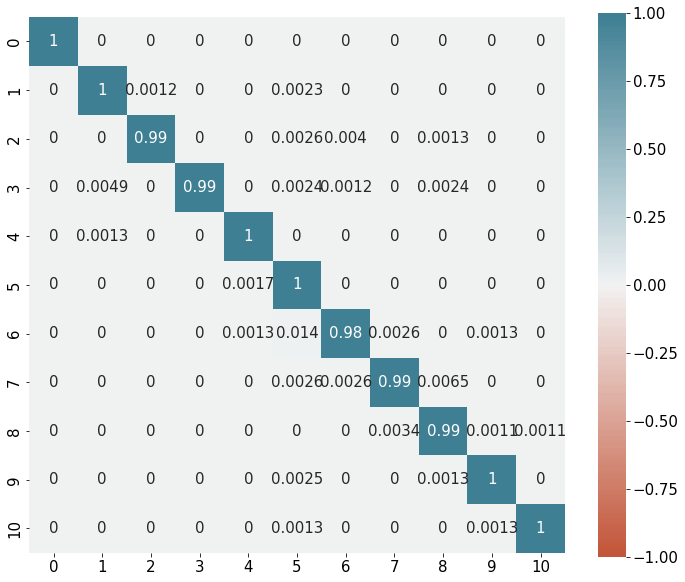

In [10]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(confusion_matrix(pre_y, true_y,normalize='true'),
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True,
 #fmt="d"
                )